Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


Importing Dataset

In [ ]:
df = pd.read_csv('TSLA.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Exploratory Data Analysis

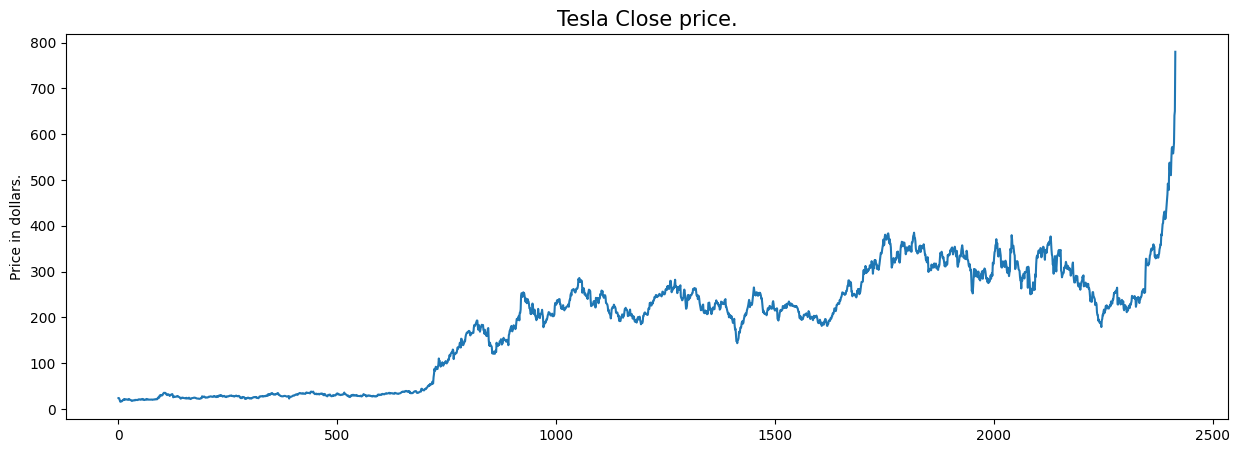

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


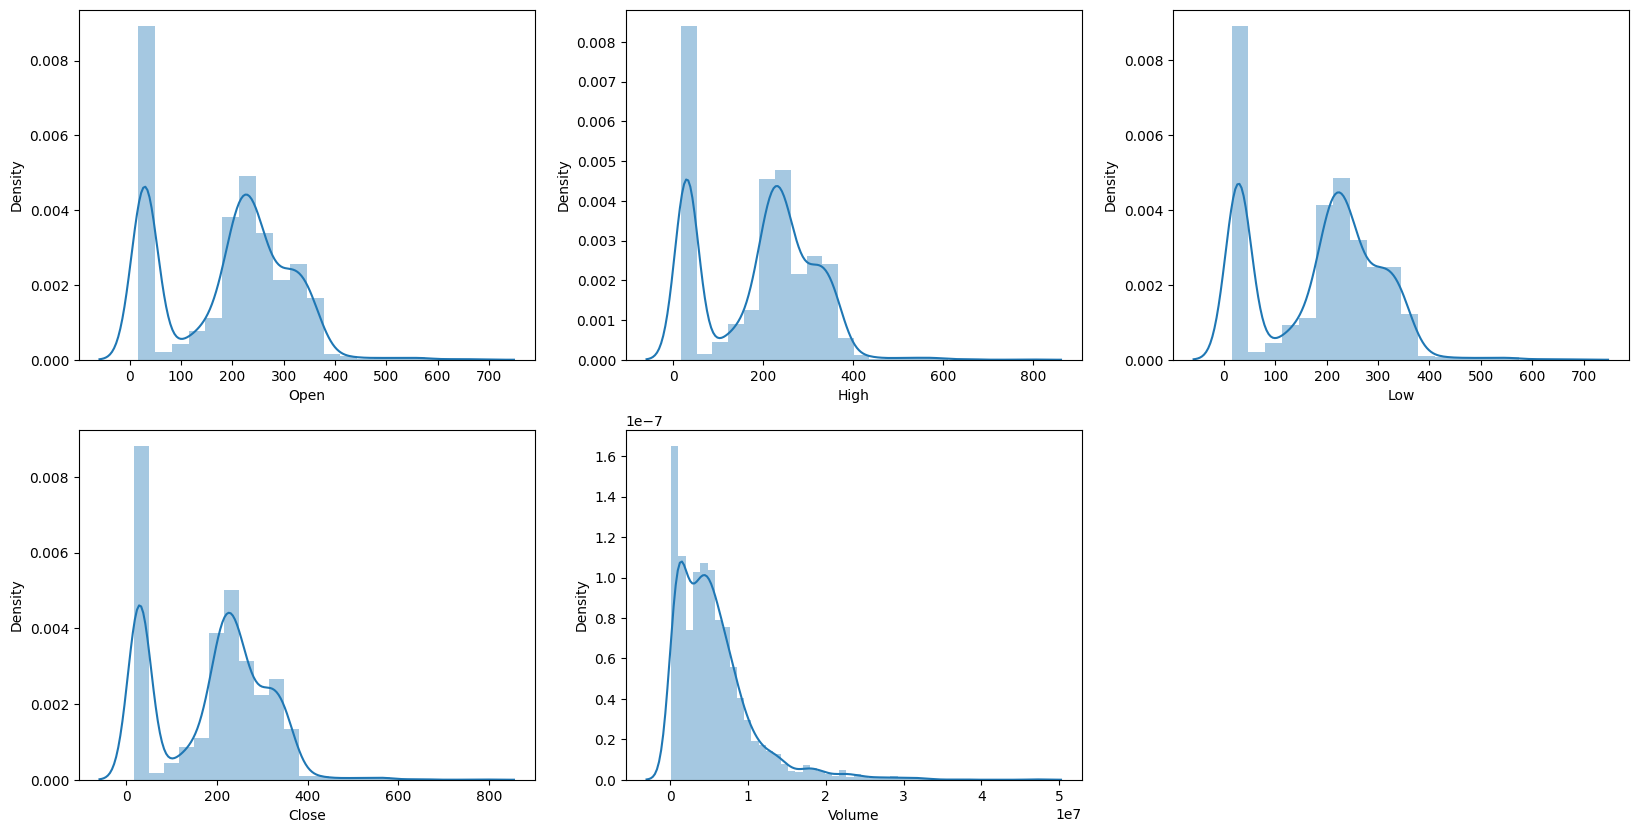

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


Feature Engineering

In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[2].astype('int')


df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6,0


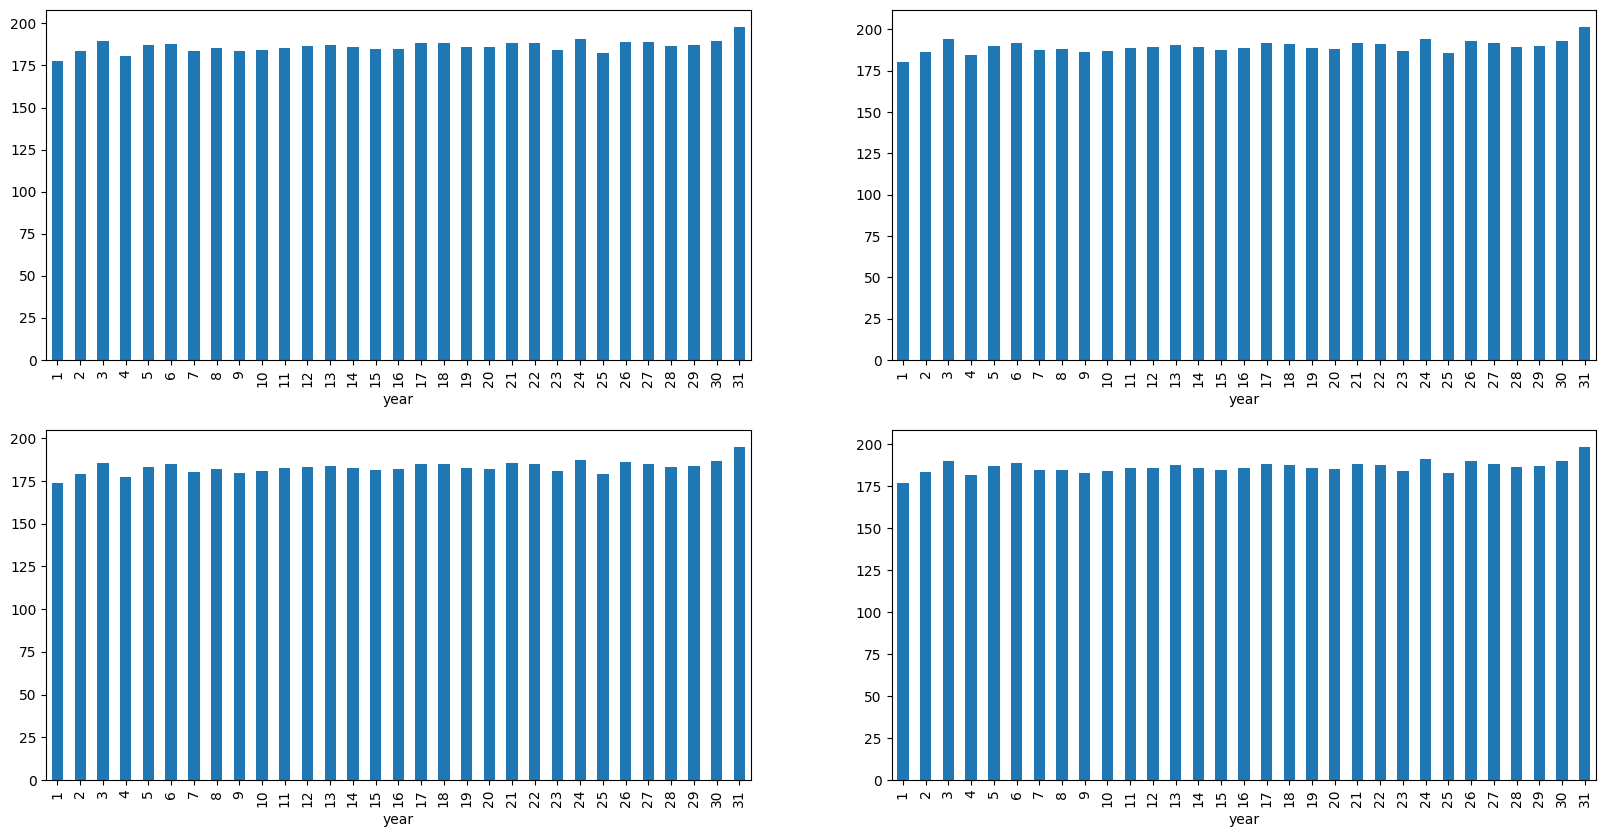

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [ ]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,186.085081,5.767062e+06,2014.816213,6.173886,15.710396
1,187.071200,190.232700,183.860262,187.047163,187.047163,5.180154e+06,2014.697500,7.597500,15.825000


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


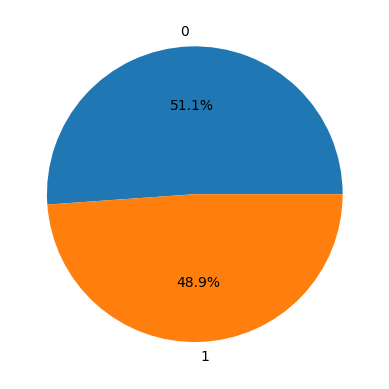

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


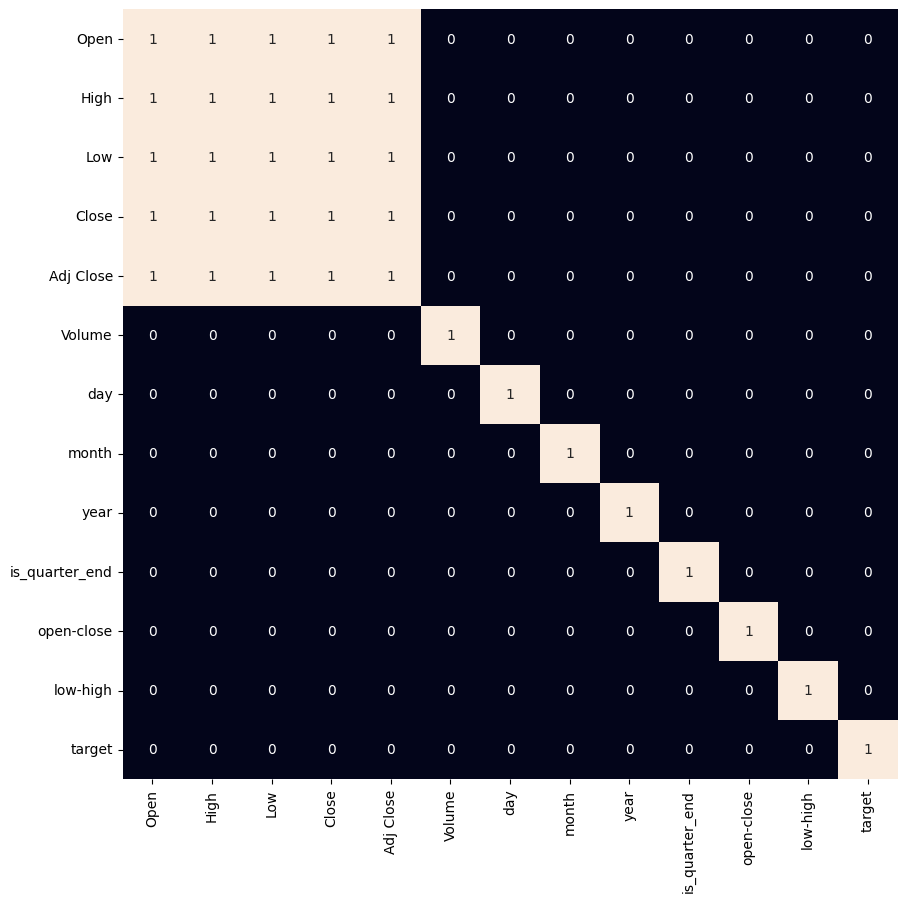

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


In [ ]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9382749759754802
Validation Accuracy :  0.4496784345922277

